#Primera parte, descarga de darknet y yolo con librerias


## Instalacion de compiladores, darknet, tensorflow

In [3]:
# nos vamos a Darknet y copiamos el codigo -> Clone
!git clone https://github.com/AlexeyAB/darknet
# actualizamos por si hay cambios 
!apt-get update
!apt-get upgrade


#build-essential is a metapackage (a package that installs many other packages, like g++ and gcc: the GNU C & C++ compilers). 
!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

!apt-get install libavcodec-dev libavformat-dev libswscale-d

!apt-get install libopencv-dev

  
%cd darknet
# sed es para cambiar partes de un fichero
!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile


!ls
%cd ../
!ls


!apt install g++-5
!apt install gcc-5

!apt update
!apt upgrade

# importamos tensorflow
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version

%cd darknet
!wget https://pjreddie.com/media/files/yolov3.weights
!make


Cloning into 'darknet'...
remote: Enumerating objects: 10908, done.
remote: Total 10908 (delta 0), reused 0 (delta 0), pack-reused 10908
Receiving objects: 100% (10908/10908), 10.56 MiB | 10.66 MiB/s, done.
Resolving deltas: 100% (7340/7340), done.
Get:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:10 https://dev

## Funciones utiles

In [0]:

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
def imsave():
  import cv2
  image = cv2.imread('predictions.jpg')
  return image
  
def imshow2(im):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = im
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  


In [10]:
# El signo de exclamacion es para ejecutar comandos Bash 
# Hacemos una lista de los ficheros existentes
!ls 

3rdparty      CMakeLists.txt	      include		     results
appveyor.yml  darknet		      json_mjpeg_streams.sh  scripts
backup	      DarknetConfig.cmake.in  LICENSE		     src
build	      darknet.py	      Makefile		     video_v2.sh
build.ps1     darknet_video.py	      net_cam_v3.sh	     video_yolov3.sh
build.sh      data		      obj		     yolov3.weights
cfg	      image_yolov2.sh	      predictions.jpg
cmake	      image_yolov3.sh	      README.md


# Segunda parte, ejecucion de codigo en Darknet

## Deteccion de imagenes de ejemplo

In [11]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/eagle.jpg
im1 = imsave()

!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
im2 = imsave()

!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg
im3 = imsave()

   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  5

## Visualizacion de resultados

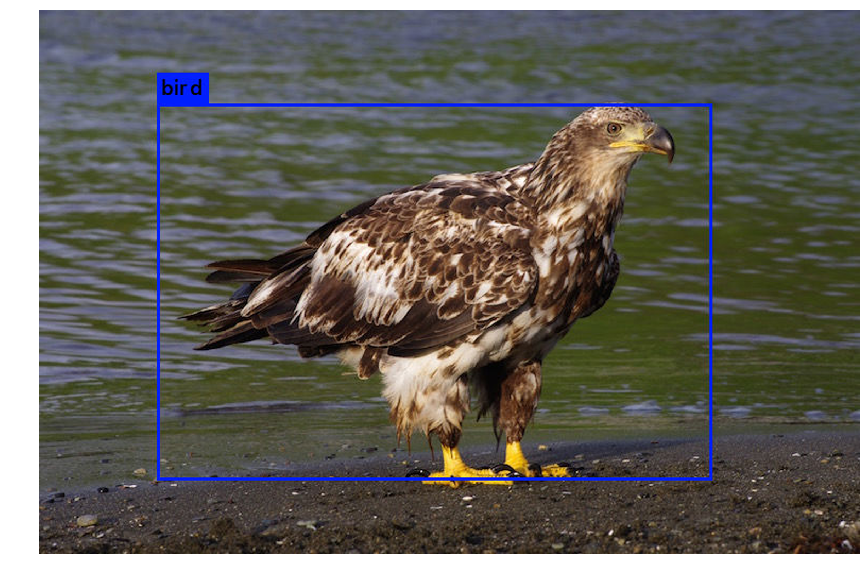

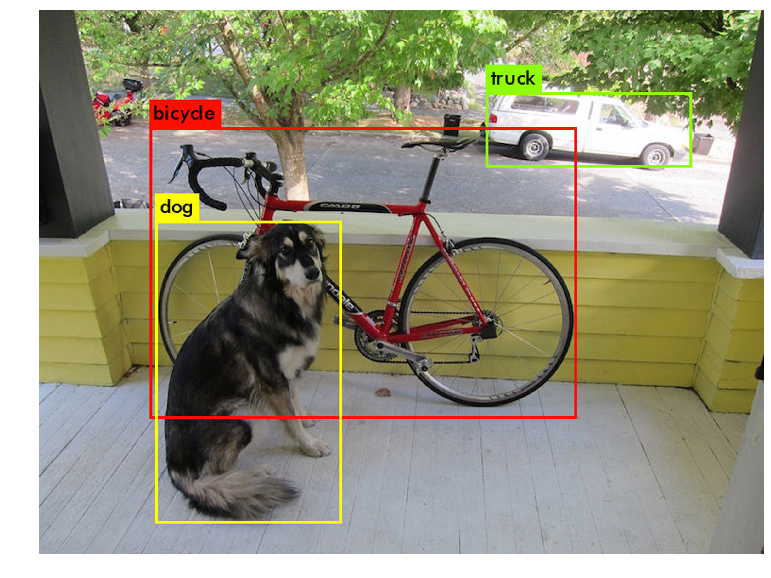

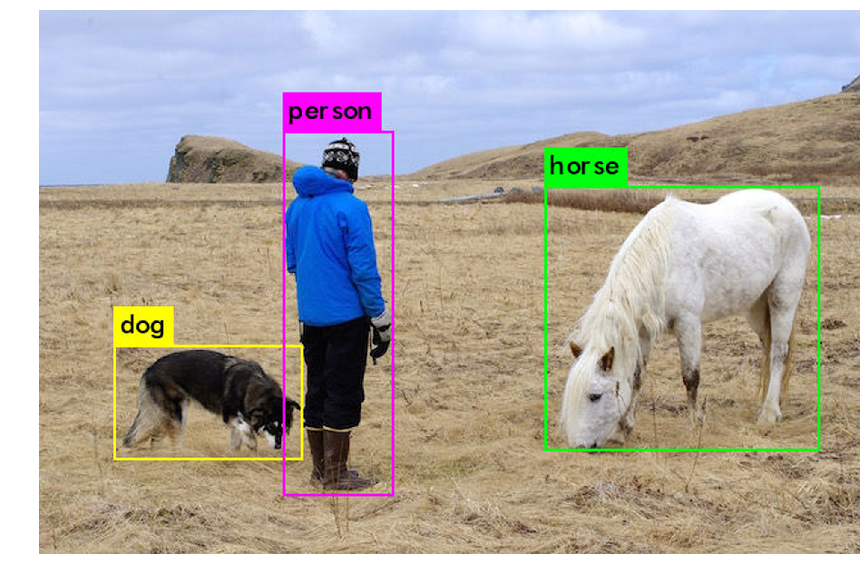

In [12]:
imshow2(im1)
imshow2(im2)
imshow2(im3)